<a href="https://colab.research.google.com/github/MarcosArize/Projetos-Ciencia-de-Dados/blob/main/Projeto_Analise_Nba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
!pip install pandas-flavor
!pip install pingouin
import math
import pandas as pd
import pandas_flavor as pf
import numpy as np
from numpy.testing import suppress_warnings
import numpy.linalg
import numpy.linalg._umath_linalg
import pingouin as pg
import sklearn
import scipy.stats as sct
from scipy.stats import norm
from scipy import constants
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from sklearn.preprocessing import QuantileTransformer
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
from itertools import cycle

In [171]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold # KFold Class.

from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Métodos Não Supervisionado

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

In [172]:
caminho = '/content/NBA_2024_per_game(03-01-2024).csv'

In [173]:
datasetNBA = pd.read_csv(caminho)

In [174]:
datasetNBA

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C-PF,24,TOT,26,0,17.2,3.0,6.6,0.453,...,0.571,2.0,3.4,5.3,1.7,0.6,0.5,1.1,1.6,7.4
1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.459,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,Precious Achiuwa,PF,24,NYK,1,0,9.0,0.0,2.0,0.000,...,NaN,1.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0
3,Bam Adebayo,C,26,MIA,23,23,34.1,8.0,15.7,0.506,...,0.777,2.1,8.3,10.4,4.0,1.1,1.0,2.7,2.4,22.0
4,Ochai Agbaji,SG,23,UTA,34,10,21.1,2.6,5.7,0.451,...,0.714,0.8,1.7,2.5,1.0,0.6,0.5,0.7,1.5,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,Thaddeus Young,PF,35,TOR,7,0,4.4,0.9,1.4,0.600,...,0.333,0.4,0.6,1.0,1.0,0.3,0.0,0.6,0.4,1.9
534,Trae Young,PG,25,ATL,30,30,36.6,8.8,20.2,0.436,...,0.860,0.5,2.5,3.0,11.3,1.4,0.2,4.3,2.0,28.3
535,Omer Yurtseven,C,25,UTA,20,6,11.7,1.8,3.5,0.507,...,0.750,1.5,2.9,4.4,0.7,0.2,0.5,1.0,1.6,4.0
536,Cody Zeller,C,31,NOP,23,0,9.6,0.6,1.7,0.333,...,0.577,1.2,1.8,3.0,1.1,0.2,0.1,0.3,1.3,1.8


In [175]:
datasetNBA['PTSCat'] = datasetNBA['PTS'].map(lambda x:'Otimo Pontuador' if x >= 30 else('Bom Pontuador' if 30> x >= 25.0 else( 'Pontuador Mediano' if 25 > x >= 15 else 'Pontuador Ruim'))).dropna()

In [176]:
datasetNBA['ASTCat'] = datasetNBA['AST'].map(lambda x: 'Otimo Passador' if x >= 10 else('Bom Passador' if  10 > x >= 7 else('Passador Mediano' if 7> x >=5 else 'Passador Ruim')))

In [177]:
datasetNBA['TRBCat'] = datasetNBA['TRB'].map(lambda x: 'Otimo Reboteiro' if x >= 10 else('Bom Reboteiro' if 10 > x >= 7 else('Reboteiro Mediano' if 7> x >= 5 else 'Reboteiro Ruim')))

In [178]:
datasetNBA['Tm'] = datasetNBA['Tm'].map(lambda x: 'CHA' if x=='CHO' else x)

In [179]:
leste = ["ATL", "BOS", "BKN", "CHA", "CHI", "CLE", "DET", "IND", "MIA", "MIL", "NYK", "ORL", "PHI", "TOR", "WAS"]
oeste = ["DAL", "DEN", "GSW", "HOU", "LAC", "LAL", "MEM", "MIN", "NOP", "OKC", "PHX", "POR", "SAC", "SAS", "UTA"]

datasetNBA['TmCat'] = datasetNBA['Tm'].map(lambda x: 'Conferencia Oeste' if x in oeste else 'Conferencia Leste')

In [180]:
datasetNBA['GSCat'] = datasetNBA['GS'].map(lambda x:'Titular' if x>16 else 'Reserva')

In [181]:
datasetNBAUNI = datasetNBA[datasetNBA['Player'].duplicated(keep='first')==False]

In [182]:
datasetNBAUNI

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,PTSCat,ASTCat,TRBCat,TmCat,GSCat
0,Precious Achiuwa,C-PF,24,TOT,26,0,17.2,3.0,6.6,0.453,...,0.6,0.5,1.1,1.6,7.4,Pontuador Ruim,Passador Ruim,Reboteiro Mediano,Conferencia Leste,Reserva
3,Bam Adebayo,C,26,MIA,23,23,34.1,8.0,15.7,0.506,...,1.1,1.0,2.7,2.4,22.0,Pontuador Mediano,Passador Ruim,Otimo Reboteiro,Conferencia Leste,Titular
4,Ochai Agbaji,SG,23,UTA,34,10,21.1,2.6,5.7,0.451,...,0.6,0.5,0.7,1.5,6.6,Pontuador Ruim,Passador Ruim,Reboteiro Ruim,Conferencia Oeste,Reserva
5,Santi Aldama,PF,23,MEM,25,5,24.0,4.2,9.5,0.443,...,0.6,0.7,1.0,1.6,11.0,Pontuador Ruim,Passador Ruim,Reboteiro Mediano,Conferencia Oeste,Reserva
6,Nickeil Alexander-Walker,SG,25,MIN,32,11,22.6,2.4,5.8,0.418,...,0.9,0.6,1.0,1.9,6.6,Pontuador Ruim,Passador Ruim,Reboteiro Ruim,Conferencia Oeste,Reserva
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,Thaddeus Young,PF,35,TOR,7,0,4.4,0.9,1.4,0.600,...,0.3,0.0,0.6,0.4,1.9,Pontuador Ruim,Passador Ruim,Reboteiro Ruim,Conferencia Leste,Reserva
534,Trae Young,PG,25,ATL,30,30,36.6,8.8,20.2,0.436,...,1.4,0.2,4.3,2.0,28.3,Bom Pontuador,Otimo Passador,Reboteiro Ruim,Conferencia Leste,Titular
535,Omer Yurtseven,C,25,UTA,20,6,11.7,1.8,3.5,0.507,...,0.2,0.5,1.0,1.6,4.0,Pontuador Ruim,Passador Ruim,Reboteiro Ruim,Conferencia Oeste,Reserva
536,Cody Zeller,C,31,NOP,23,0,9.6,0.6,1.7,0.333,...,0.2,0.1,0.3,1.3,1.8,Pontuador Ruim,Passador Ruim,Reboteiro Ruim,Conferencia Oeste,Reserva


In [183]:
absoluta = datasetNBAUNI['Pos'].value_counts()
print(absoluta)

Pos
SG       120
SF       111
PF       103
C         92
PG        89
C-PF       1
SF-PF      1
SG-PG      1
Name: count, dtype: int64


In [184]:
datasetNBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  538 non-null    object 
 1   Pos     538 non-null    object 
 2   Age     538 non-null    int64  
 3   Tm      538 non-null    object 
 4   G       538 non-null    int64  
 5   GS      538 non-null    int64  
 6   MP      538 non-null    float64
 7   FG      538 non-null    float64
 8   FGA     538 non-null    float64
 9   FG%     530 non-null    float64
 10  3P      538 non-null    float64
 11  3PA     538 non-null    float64
 12  3P%     489 non-null    float64
 13  2P      538 non-null    float64
 14  2PA     538 non-null    float64
 15  2P%     521 non-null    float64
 16  eFG%    530 non-null    float64
 17  FT      538 non-null    float64
 18  FTA     538 non-null    float64
 19  FT%     476 non-null    float64
 20  ORB     538 non-null    float64
 21  DRB     538 non-null    float64
 22  TR

In [185]:
datasetNBAUNI.to_csv('/content/NBA_2024_per_gameUNI(03-01-2024).csv')

In [186]:
datasetNBA = pd.read_csv('/content/NBA_2024_per_gameUNI(03-01-2024).csv')

In [187]:
absolutaPontos = datasetNBA['PTSCat'].value_counts()
print(absolutaPontos)
plt.savefig('/content/Points',dpi=300)

PTSCat
Pontuador Ruim       431
Pontuador Mediano     67
Bom Pontuador         15
Otimo Pontuador        5
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

In [188]:
relativaPontos = round(datasetNBA['PTSCat'].value_counts(normalize=True)*100,2)
print(relativaPontos)

PTSCat
Pontuador Ruim       83.20
Pontuador Mediano    12.93
Bom Pontuador         2.90
Otimo Pontuador       0.97
Name: proportion, dtype: float64


In [189]:
absolutaAssistencia = datasetNBA['ASTCat'].value_counts()
print(absolutaAssistencia)
plt.savefig('/content/Assit',dpi=300)

ASTCat
Passador Ruim       471
Passador Mediano     32
Bom Passador         13
Otimo Passador        2
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

In [190]:
relativaAssistencia = round(datasetNBA['ASTCat'].value_counts(normalize=True)*100,2)
print(relativaAssistencia)

ASTCat
Passador Ruim       90.93
Passador Mediano     6.18
Bom Passador         2.51
Otimo Passador       0.39
Name: proportion, dtype: float64


In [191]:
absolutaRebote = datasetNBA['TRBCat'].value_counts()
print(absolutaRebote)
plt.savefig('/content/Rebound')

TRBCat
Reboteiro Ruim       409
Reboteiro Mediano     60
Bom Reboteiro         33
Otimo Reboteiro       16
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

In [192]:
relativaRebote = round(datasetNBA['TRBCat'].value_counts(normalize=True)*100,2)
print(relativaRebote)

TRBCat
Reboteiro Ruim       78.96
Reboteiro Mediano    11.58
Bom Reboteiro         6.37
Otimo Reboteiro       3.09
Name: proportion, dtype: float64


In [193]:
datasetNBA = datasetNBA[datasetNBA['Pos'].isin(['C-PF', 'SG-PG', 'SF-PF'])==False]


In [194]:
round(datasetNBA['Pos'].value_counts(normalize=True)*100,2)

,proportion
Pos,
SG,23.30
SF,21.55
PF,20.00
C,17.86
PG,17.28


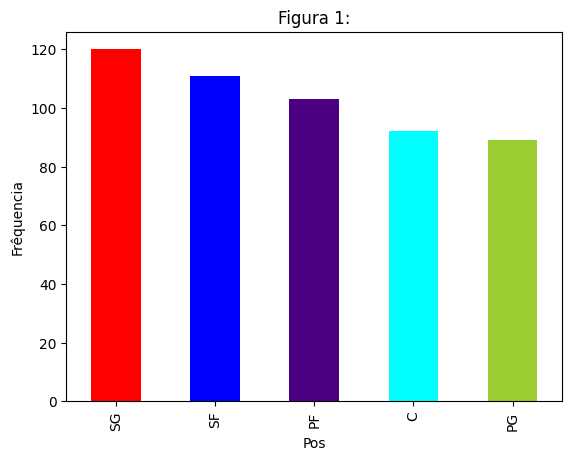

In [195]:
datasetNBA['Pos'].value_counts().plot(kind='bar',color = ['red','blue','indigo','cyan','yellowgreen'])
plt.ylabel('Frêquencia')
plt.title('Figura 1:')
plt.show()

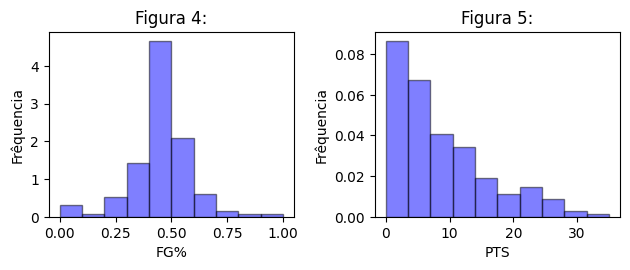

In [196]:



plt.subplot(2,2,1)
plt.hist(data=datasetNBA, x='FG%',color='blue',histtype='bar',rwidth=2,edgecolor='black',density=True,alpha=.5)
plt.xlabel('FG%')
plt.ylabel('Frêquencia')
plt.title('Figura 4:')


plt.subplot(2,2,2)
plt.hist(data=datasetNBA, x='PTS',color='blue',histtype='bar',rwidth=2,edgecolor='black',density=True,alpha=.5)
plt.xlabel('PTS')
plt.ylabel('Frêquencia')
plt.title('Figura 5:')
plt.tight_layout()
plt.show()

Interpretação dos resultados(frêquencia e graficos): é possivel perceber que a maioria dos jogadores estão classificados na gama dos "ruins" em pelo menos uma das categorias entre Pontos, Assistencias e Rebotes, podemos perceber que a maior porcentagem do qual os jogadores são classificados como ruins é na categoria de assistencias, onde 90.87% dos jogadores da nossa base de dados são classificados como passadores ruins, a categoria na qual mais se possuem jogadores que são determinados como otimos é o rebote onde temos 3.11% dos jogadores classificados na mesma. Na figura 1 é possivel observar que as posições do jogadores da nba estão bem distribuidas ao redor de 20%, com SG(ala-armador) tendo uma leve vantagem com 23.30% e PG(armardor) sendo a que possui menor quantidade com aproximadamente 17.28% ja na segunda figura é possivel que a maioria dos jogadores da NBA estão por volta de 20 a 28 anos, tendo o pico no numero de jogadores que tem 24 anos,  

In [197]:
datasetNBA.dropna().dropna().describe()

,Unnamed: 0,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,...,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,268.249417,25.927739,22.571096,10.710956,20.484382,3.544755,7.628205,0.451184,1.107692,3.090210,...,0.761965,0.848718,2.689744,3.537296,2.254079,0.643357,0.412587,1.115851,1.666200,9.724009
std,152.506307,4.386886,9.157128,12.235821,9.867350,2.597492,5.286000,0.095360,0.926612,2.291787,...,0.162110,0.700854,1.840367,2.409223,1.994317,0.418759,0.449070,0.852446,0.791426,7.240615
min,3.000000,19.000000,1.000000,0.000000,2.000000,0.000000,0.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,138.000000,23.000000,15.000000,0.000000,12.000000,1.500000,3.300000,0.406000,0.400000,1.300000,...,0.683000,0.300000,1.300000,1.800000,0.800000,0.300000,0.100000,0.500000,1.100000,4.100000
50%,265.000000,25.000000,25.000000,5.000000,20.900000,2.800000,6.200000,0.457000,0.900000,2.600000,...,0.781000,0.700000,2.400000,3.100000,1.600000,0.600000,0.300000,0.900000,1.700000,7.500000
75%,402.000000,29.000000,31.000000,23.000000,29.400000,5.000000,10.700000,0.493000,1.700000,4.600000,...,0.863000,1.100000,3.600000,4.600000,3.200000,0.900000,0.600000,1.500000,2.200000,13.500000
max,536.000000,39.000000,35.000000,35.000000,37.400000,11.800000,23.600000,0.800000,4.700000,11.600000,...,1.000000,3.600000,9.200000,12.300000,12.700000,2.600000,3.100000,4.300000,3.800000,35.000000


In [198]:
variaveisQuantitativas = ['Age','G','MP','FG','FGA','FG%','2P','2PA','2P%','3P','3PA','3P%','eFG%','FT','FTA','FT%', 'ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']


datasetNBA = datasetNBA.loc[(datasetNBA[variaveisQuantitativas] != 0).all(axis=1)]



In [199]:
datasetNBA[variaveisQuantitativas].dropna().describe()

,Age,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,...,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,26.421212,25.033333,23.261515,4.112121,8.847273,0.455767,2.774545,5.199394,0.526824,1.339394,...,0.777658,0.896667,3.026667,3.924242,2.643333,0.741212,0.457576,1.292727,1.840000,11.328485
std,4.380272,7.456996,8.631888,2.578360,5.226686,0.063811,2.127177,3.868272,0.081351,0.893829,...,0.115157,0.629339,1.731687,2.224720,2.063587,0.385763,0.435876,0.856129,0.693592,7.232936
min,19.000000,5.000000,5.000000,0.400000,1.000000,0.240000,0.100000,0.200000,0.143000,0.100000,...,0.300000,0.100000,0.300000,0.400000,0.100000,0.100000,0.100000,0.100000,0.300000,1.300000
25%,23.000000,20.000000,16.125000,2.100000,4.625000,0.422250,1.100000,2.200000,0.480250,0.600000,...,0.719250,0.400000,1.800000,2.400000,1.100000,0.500000,0.200000,0.700000,1.300000,5.700000
50%,26.000000,28.000000,23.950000,3.500000,7.550000,0.459000,2.100000,4.000000,0.527000,1.100000,...,0.784500,0.700000,2.800000,3.600000,2.000000,0.700000,0.300000,1.000000,1.800000,9.450000
75%,29.000000,31.000000,30.450000,5.600000,11.900000,0.489000,3.875000,7.400000,0.577750,1.900000,...,0.857000,1.200000,3.900000,4.900000,3.700000,1.000000,0.600000,1.700000,2.300000,15.175000
max,39.000000,35.000000,37.400000,11.800000,23.600000,0.667000,11.100000,18.600000,0.737000,4.700000,...,1.000000,3.300000,9.200000,12.300000,12.700000,2.600000,3.100000,4.300000,3.700000,35.000000


In [200]:
datasetNBA[variaveisQuantitativas].mean()

,0
Age,26.421212
G,25.033333
MP,23.261515
FG,4.112121
FGA,8.847273
FG%,0.455767
2P,2.774545
2PA,5.199394
2P%,0.526824
3P,1.339394


In [201]:
datasetNBA[variaveisQuantitativas].std()

,0
Age,4.380272
G,7.456996
MP,8.631888
FG,2.578360
FGA,5.226686
FG%,0.063811
2P,2.127177
2PA,3.868272
2P%,0.081351
3P,0.893829


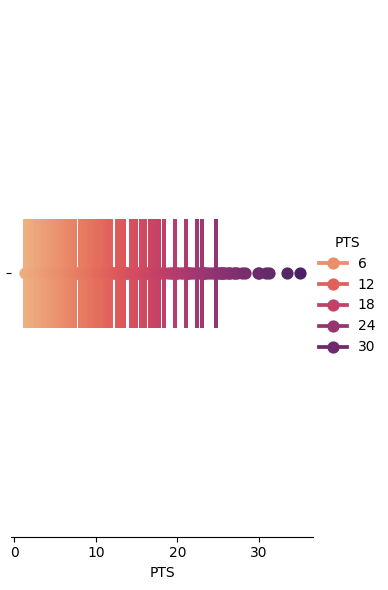

In [202]:
g = sns.catplot(data=datasetNBA.dropna(), x='PTS',capsize=.2,hue='PTS',palette="flare", errorbar="se",kind="point", height=6, aspect=.55)
g.despine(left=True)
g.set_titles("Gráfico de Média de pontos")

In [203]:
CV=datasetNBA[variaveisQuantitativas].std()/datasetNBA[variaveisQuantitativas].mean()*100
print(CV)

Age     16.578619
G       29.788266
MP      37.108020
FG      62.701447
FGA     59.076802
FG%     14.000807
2P      76.667585
2PA     74.398510
2P%     15.441789
3P      66.733816
3PA     60.113624
3P%     24.218986
eFG%    12.488442
FT      93.596416
FTA     89.357281
FT%     14.808204
ORB     70.186533
DRB     57.214326
TRB     56.691713
AST     78.067593
STL     52.044890
BLK     95.257704
TOV     66.226539
PF      37.695219
PTS     63.847334
dtype: float64


In [204]:
datasetNBA[variaveisQuantitativas].quantile([.25,.50,.75])

,Age,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0.25,23.0,20.0,16.125,2.1,4.625,0.42225,1.100,2.2,0.48025,0.6,...,0.71925,0.4,1.8,2.4,1.1,0.5,0.2,0.7,1.3,5.700
0.50,26.0,28.0,23.950,3.5,7.550,0.45900,2.100,4.0,0.52700,1.1,...,0.78450,0.7,2.8,3.6,2.0,0.7,0.3,1.0,1.8,9.450
0.75,29.0,31.0,30.450,5.6,11.900,0.48900,3.875,7.4,0.57775,1.9,...,0.85700,1.2,3.9,4.9,3.7,1.0,0.6,1.7,2.3,15.175


In [205]:
maximo=max(datasetNBA['PTS'])
minimo=min(datasetNBA.dropna()['PTS'])
[minimo, maximo]

[1.3, 35.0]

<Axes: ylabel='Age'>

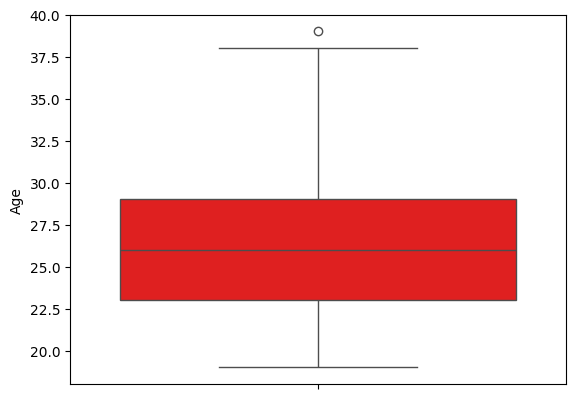

In [206]:
sns.boxplot(y = 'Age', data = datasetNBA.dropna(), color='red')

In [207]:
IQ1 = datasetNBA['Age'].dropna().quantile(0.25) - 1.5 * (datasetNBA['Age'].dropna().quantile(0.75) - datasetNBA['Age'].dropna().quantile(0.25))
IQ2 = datasetNBA['Age'].quantile(0.75) + 1.5 * (datasetNBA['Age'].quantile(0.75) - datasetNBA['Age'].quantile(0.25))

[IQ1, IQ2]


[np.float64(14.0), np.float64(38.0)]

In [208]:
Crosstab1= pd.crosstab(datasetNBA.PTSCat,datasetNBA.ASTCat,margins=True)
Crosstab1

ASTCat,Bom Passador,Otimo Passador,Passador Mediano,Passador Ruim,All
PTSCat,,,,,
Bom Pontuador,4,1,7,3,15
Otimo Pontuador,1,0,4,0,5
Pontuador Mediano,6,1,14,43,64
Pontuador Ruim,2,0,6,238,246
All,13,2,31,284,330


In [209]:
Crosstab2 = pd.crosstab(datasetNBA.PTSCat, datasetNBA.TRBCat, margins=True)
Crosstab2

TRBCat,Bom Reboteiro,Otimo Reboteiro,Reboteiro Mediano,Reboteiro Ruim,All
PTSCat,,,,,
Bom Pontuador,2,2,5,6,15
Otimo Pontuador,1,2,1,1,5
Pontuador Mediano,11,4,16,33,64
Pontuador Ruim,9,1,28,208,246
All,23,9,50,248,330


In [210]:
datasetNBA['PTS'].dropna().corr(datasetNBA['FG'].dropna())

np.float64(0.9920250928799377)

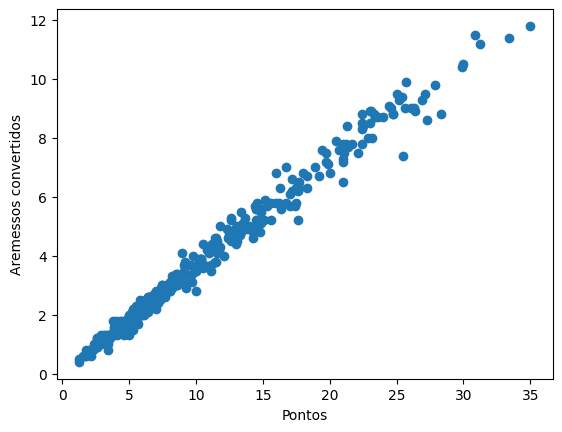

In [211]:
plt.scatter(x='PTS',y='FG',data=datasetNBA)
plt.xlabel('Pontos')
plt.ylabel('Aremessos convertidos')
plt.savefig('')
plt.show()

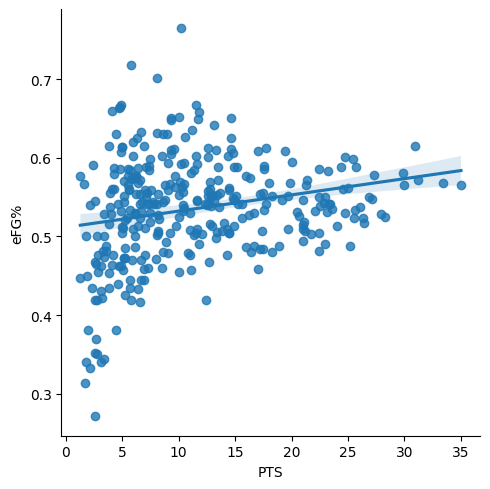

In [212]:
grafico = sns.lmplot(x='PTS',y='eFG%',data = datasetNBA)
grafico.set_xlabels('PTS')
grafico.set_ylabels('eFG%')
grafico

Text(0.5, 1.0, 'Grafico pontuação por posição')

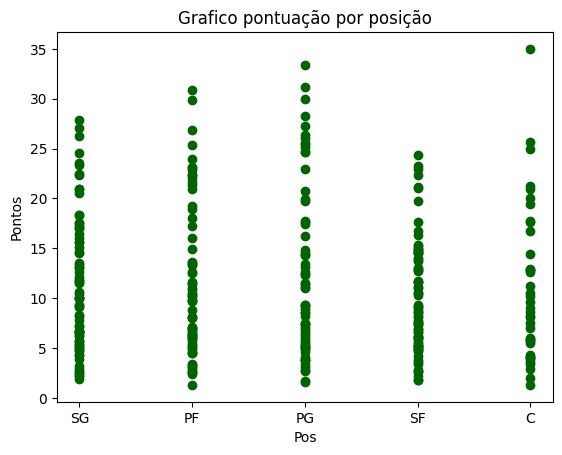

In [213]:
plt.scatter(x='Pos',y='PTS',data=datasetNBA, color ='darkgreen')
plt.xlabel('Pos')
plt.ylabel('Pontos')
plt.title('Grafico pontuação por posição')



In [214]:
datasetNBA['PF'], _ = stats.yeojohnson(datasetNBA['PF'])

In [215]:
pg.normality(datasetNBA.dropna(), method='normaltest').round(3)

,W,pval,normal
Unnamed: 0,171.436,0.000,False
Age,17.408,0.000,False
G,34.511,0.000,False
GS,3938.233,0.000,False
MP,79.679,0.000,False
FG,29.326,0.000,False
FGA,29.057,0.000,False
FG%,14.809,0.001,False
3P,30.890,0.000,False
3PA,27.794,0.000,False


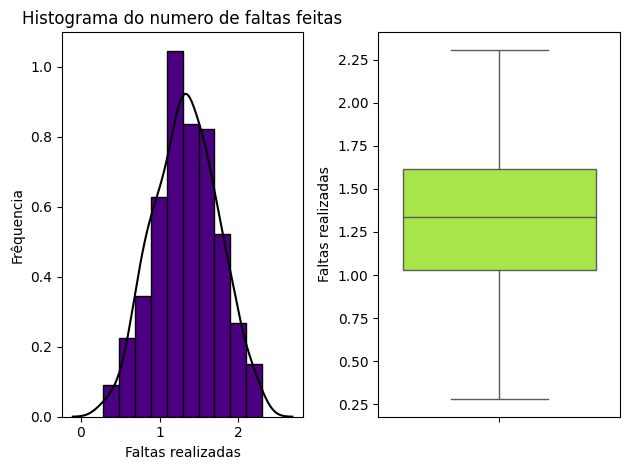

In [216]:

plt.subplot(1,2,1)
plt.hist(x='PF',data=datasetNBA,color='Indigo',edgecolor='Black',density=True)
plt.xlabel('Faltas realizadas')
plt.ylabel('Frêquencia')
sns.kdeplot(datasetNBA['PF'].dropna(), color='black')
plt.title('Histograma do numero de faltas feitas')

plt.subplot(1,2,2)
grafico1 = sns.boxplot(data=datasetNBA.dropna(),y='PF',color='greenyellow')
grafico1.set_ylabel('Faltas realizadas')
plt.tight_layout()


Text(0.5, 1.0, 'QQ plot das faltas realizadas pelos jogadores')

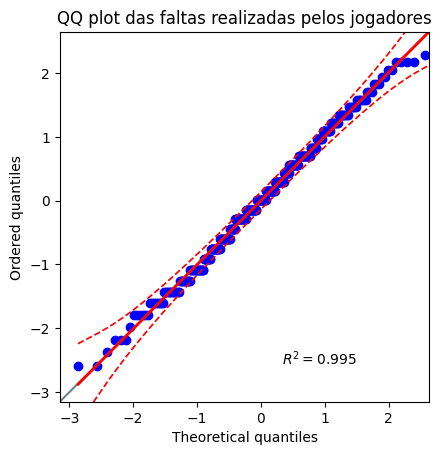

In [217]:
pg.qqplot(datasetNBA['PF'],dist='norm')
plt.title('QQ plot das faltas realizadas pelos jogadores')

In [218]:
from pingouin import ttest

In [219]:
datasetNBA['PF'].mean()

np.float64(1.3333518787778234)

In [220]:
datasetNBA['PF'].std()

0.40759025293300033

H0: a media de falta dos jogadores da NBA é =0


H1: a media de falta dos jogares da nba é != 0

In [221]:
ttest(datasetNBA['PF'], datasetNBA.shape[0]-1)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-14603.784601,329,two-sided,0.0,"[1.29, 1.38]",803.911884,inf,1.0


Interpretação: podemos afirmar que a media de faltas é significante pois o p-val 0<0.05, logo conseguimos rejeitar a hipotese nula chegando que a media dos jogadores é diferente de 0

In [222]:
filtro1 = datasetNBA['GSCat'] == 'Titular'
filtro2 = datasetNBA['GSCat'] == 'Reserva'
Titular = datasetNBA[filtro1]
Reserva = datasetNBA[filtro2]

In [223]:
[[Titular['PF'].mean(),Reserva['PF'].mean()]],[[Titular['PF'].std(),Reserva['PF'].std()]]

([[np.float64(1.5907961270644844), np.float64(1.1763736786030303)]],
 [[0.32839009959035037, 0.3701364832026736]])

H0: A diferença na variaciancia das faltas cometidas por jogadores titulares e reservas não é significativa

---
H1: A diferença na variaciancia das faltas cometidas por jogadores titulares e reservas é significativa


In [224]:
stats.bartlett(Titular['PF'],Reserva['PF'])

BartlettResult(statistic=np.float64(2.15469592693963), pvalue=np.float64(0.14213457923335204))

Temos um p-valor >0.05, logo podemos aceitar a hipotese nula que nos diz que a diferença entre a variancia das faltas cometidas dos jogadores titulares e reservas não é significativa

H0: a media de faltas dos jogadores titulares não é significativamente maior que a media de faltas dos jogadores reservas

---

H1: a media de faltas dos jogadores titulares é significativamente maior que a media de falta dos jogadores reservas

In [225]:
ttest(Titular['PF'],Reserva['PF'],paired=False,alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,10.591394,286.14762,greater,1.234286e-22,"[0.35, inf]",1.167611,6.922e+19,1.0


Nós temos um valor menor que 0.05 para o p-val, logo rejeitamos a hipotese numa da qual assumimos como que a media de faltas dos jogadores titulares não é significativamente maior que a media de falta dos jogadores reservas

Text(0, 0.5, 'Faltas Cometidas')

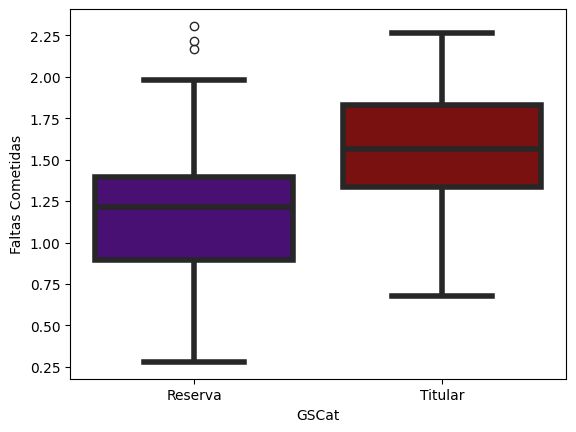

In [226]:
grafico3 = sns.boxplot(x='GSCat',y='PF',data=datasetNBA, linewidth=4,hue='GSCat',palette=['indigo','darkred'])
grafico3.set_ylabel("Faltas Cometidas")

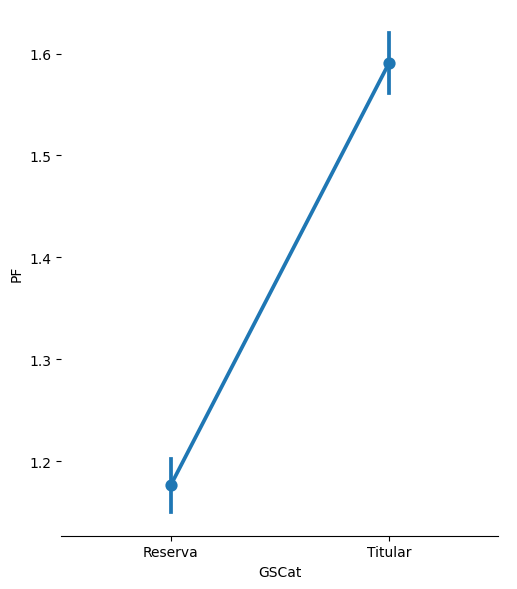

In [227]:
grafico4 = sns.catplot(x='GSCat',y='PF',data=datasetNBA,errorbar='se',kind='point', height=6, aspect=.85,)
grafico4.despine(left=True)

In [228]:
filtro3 = datasetNBA['Pos'] == 'PG'
filtro4 = datasetNBA['Pos'] == 'SG'
filtro5 = datasetNBA['Pos'] == 'SF'
filtro6 = datasetNBA['Pos'] == 'PF'
filtro7 = datasetNBA['Pos'] == 'C'
PG = datasetNBA[filtro3]
SG = datasetNBA[filtro4]
SF = datasetNBA[filtro5]
PF = datasetNBA[filtro6]
C = datasetNBA[filtro7]

In [229]:
data = [list(PG['PF']),list(SG['PF']),list(SF['PF']),list(PF['PF']),list(C['PF'])]
pg.homoscedasticity(data,method="levene")

,W,pval,equal_var
levene,2.063088,0.085398,True


In [230]:
pg.homoscedasticity(data,method="bartlett")

,T,pval,equal_var
bartlett,7.786781,0.099708,True


H0: a media das faltas cometidas pelos jogadores não difere significativamente dependendo da posição que o jogador joga

In [231]:
ANOVA = datasetNBA.anova(dv='PF',between= ['Pos'])
ANOVA

,Source,ddof1,ddof2,F,p-unc,np2
0,Pos,4,325,3.920891,0.004003,0.046036


Tendo o p-valor menor que 0.05, rejeitamos então a hipotese nula da qual a media das faltas cometidas não difere significativamente dependendo da posição do qual o jogador joga

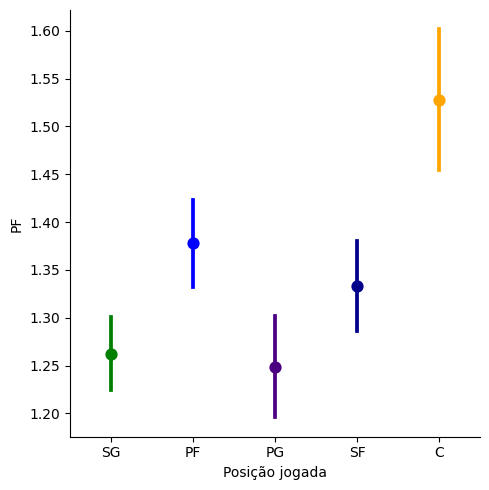

In [232]:
grafico5 = sns.catplot(x='Pos',y='PF',data=datasetNBA,hue='Pos',palette=['green','blue','indigo','darkblue','orange'],errorbar='se',kind='point')
grafico5.set_xlabels('Posição jogada')

In [233]:
datasetNBA.pairwise_tests(dv='PF',between=('Pos'),effsize='none')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,none
0,Pos,C,PF,False,True,1.736712,69.000512,two-sided,0.086901,0.792,0.361213
1,Pos,C,PG,False,True,3.086170,77.403980,two-sided,0.002813,13.077,0.628310
2,Pos,C,SF,False,True,2.225099,71.600264,two-sided,0.029226,1.837,0.451215
3,Pos,C,SG,False,True,3.207847,60.560619,two-sided,0.002138,18.193,0.694934
4,Pos,PF,PG,False,True,1.854174,132.492023,two-sided,0.065938,0.867,0.316027
5,Pos,PF,SF,False,True,0.676607,145.978431,two-sided,0.499726,0.218,0.111073
6,Pos,PF,SG,False,True,1.947174,139.763276,two-sided,0.053519,0.998,0.322279
7,Pos,PG,SF,False,True,-1.196047,136.897591,two-sided,0.233746,0.346,-0.201024
8,Pos,PG,SG,False,True,-0.207899,123.107132,two-sided,0.835651,0.184,-0.035470
9,Pos,SF,SG,False,True,1.171535,143.033721,two-sided,0.243331,0.329,0.190405


In [234]:
ANOVA1 = datasetNBA.anova(dv='PF',between=['Pos','GSCat'])
ANOVA1

,Source,SS,DF,MS,F,p-unc,np2
0,Pos,2.596727,4.0,0.649182,5.523444,2.600940e-04,0.064584
1,GSCat,13.416908,1.0,13.416908,114.155328,5.447193e-23,0.262937
2,Pos * GSCat,1.113397,4.0,0.278349,2.368285,5.260317e-02,0.028752
3,Residual,37.610251,320.0,0.117532,NaN,NaN,NaN


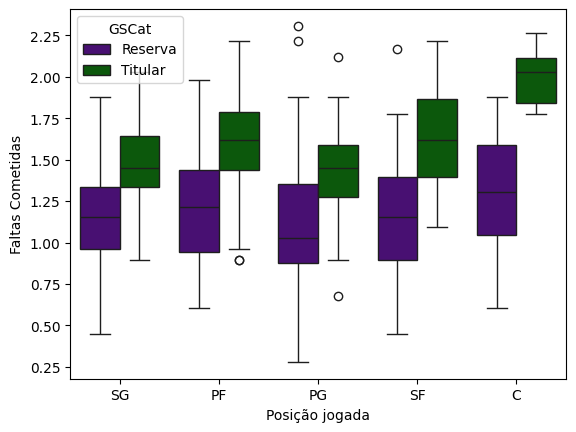

In [235]:
sns.boxplot(data=datasetNBA,x='Pos',y='PF',hue='GSCat',palette=['indigo','darkgreen'])
plt.ylabel('Faltas Cometidas')
plt.xlabel('Posição jogada')
plt.show()

In [236]:
datasetNBA.pairwise_tests(dv='PF',between=['Pos','GSCat'])

,Contrast,Pos,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Pos,-,C,PF,False,True,1.736712,69.000512,two-sided,8.690072e-02,0.792,0.358745
1,Pos,-,C,PG,False,True,3.086170,77.403980,two-sided,2.812597e-03,13.077,0.623812
2,Pos,-,C,SF,False,True,2.225099,71.600264,two-sided,2.922583e-02,1.837,0.448240
3,Pos,-,C,SG,False,True,3.207847,60.560619,two-sided,2.138328e-03,18.193,0.690311
4,Pos,-,PF,PG,False,True,1.854174,132.492023,two-sided,6.593782e-02,0.867,0.314294
5,Pos,-,PF,SF,False,True,0.676607,145.978431,two-sided,4.997258e-01,0.218,0.110501
6,Pos,-,PF,SG,False,True,1.947174,139.763276,two-sided,5.351896e-02,0.998,0.320609
7,Pos,-,PG,SF,False,True,-1.196047,136.897591,two-sided,2.337457e-01,0.346,-0.199952
8,Pos,-,PG,SG,False,True,-0.207899,123.107132,two-sided,8.356513e-01,0.184,-0.035280
9,Pos,-,SF,SG,False,True,1.171535,143.033721,two-sided,2.433315e-01,0.329,0.189445


In [237]:
pd.crosstab(datasetNBA.Pos,datasetNBA.GSCat,margins=True,normalize='index')

GSCat,Reserva,Titular
Pos,,
C,0.650000,0.350000
PF,0.555556,0.444444
PG,0.597015,0.402985
SF,0.657895,0.342105
SG,0.653333,0.346667
All,0.621212,0.378788


In [238]:
from scipy.stats import chi2_contingency

In [282]:
import warnings

# Ignorar TODOS os warnings
warnings.filterwarnings("ignore")

expected, observed, stats = pg.chi2_independence(datasetNBA, x='Pos', y='PTSCat')


H0: Pos e PTSCat são variaveis independentes

---
H1: são variaveis dependentes


In [240]:
stats.round(15)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,19.916136,12.0,0.068689,0.141836,0.329894
1,cressie-read,0.666667,19.916947,12.0,0.068673,0.141838,0.329908
2,log-likelihood,0.000000,22.727737,12.0,0.030128,0.151517,0.379177
3,freeman-tukey,-0.500000,NaN,12.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,12.0,0.000000,inf,NaN
5,neyman,-2.000000,NaN,12.0,NaN,NaN,NaN


de acordo com o teste de pearson temos um p-val>0.05, logo para esse nivel de confiança podemos dizer que as duas variaveis são independentes aceitando a hipotese nula

In [241]:
expected.round(2)

PTSCat,Bom Pontuador,Otimo Pontuador,Pontuador Mediano,Pontuador Ruim
Pos,,,,
C,1.82,0.61,7.76,29.82
PF,3.27,1.09,13.96,53.67
PG,3.05,1.02,12.99,49.95
SF,3.45,1.15,14.74,56.65
SG,3.41,1.14,14.55,55.91


In [242]:
EFG= pg.linear_regression(datasetNBA['FG'],datasetNBA['eFG%'])
EFG

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.510301,0.006752,75.573493,1.501783e-209,0.054067,0.051183,0.497017,0.523584
1,FG,0.006026,0.001392,4.329854,1.984837e-05,0.054067,0.051183,0.003288,0.008764


O eFG% (Percentual de Arremesso Eficaz) é uma formula no basquete que mede a eficiência de um jogador nos arremessos, considerando que arremessos de três pontos por serem mais dificeis possuem um peso maior. É parecido com o FG% (percentual de acerto), mas o eFG% dá um peso extra aos arremessos de três pontos, refletindo melhor o impacto real desses pontos no jogo.


sendo sua formula:

eFG% = (FG + (0.5 * 3P)) / FGA

In [243]:
x = 5
y=0.006*x + 0.5103
y

0.5403

O que a regressão linear nos diz é que para um jogador que chuta 3 bolas por jogo seu eFG%(Taxa de acertos efetiva) é de 0.528 ou seja 52.8% de eficiencia utilizando essa formula

In [244]:
EFG1= pg.linear_regression(datasetNBA[['FG','3P']],datasetNBA['eFG%'])
EFG1

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.502059,0.006985,71.876370,2.111145e-202,0.092449,0.086898,0.488317,0.515800
1,FG,0.001859,0.001766,1.052336,2.934223e-01,0.092449,0.086898,-0.001616,0.005334
2,3P,0.018948,0.005095,3.718801,2.354806e-04,0.092449,0.086898,0.008925,0.028972


In [245]:
X1 = 5
X2= 3
Y1 = 0.001*X1 + 0.018*X2 + 0.502
Y1

0.5609999999999999

## **Aprendizado de maquina:**

In [246]:
datasetNBA['eFG%'].mean()

np.float64(0.5350818181818182)

In [247]:
datasetNBA['eFG%Cat'] = datasetNBA['eFG%'].map(lambda x: float(0) if x<0.535081 else float(1))

In [248]:
datasetNBA['PTSCat1'] = datasetNBA['PTS'].map(lambda x: float(0) if x<18 else float(1))

In [249]:
datasetNBA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 2 to 515
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  330 non-null    int64  
 1   Player      330 non-null    object 
 2   Pos         330 non-null    object 
 3   Age         330 non-null    int64  
 4   Tm          330 non-null    object 
 5   G           330 non-null    int64  
 6   GS          330 non-null    int64  
 7   MP          330 non-null    float64
 8   FG          330 non-null    float64
 9   FGA         330 non-null    float64
 10  FG%         330 non-null    float64
 11  3P          330 non-null    float64
 12  3PA         330 non-null    float64
 13  3P%         330 non-null    float64
 14  2P          330 non-null    float64
 15  2PA         330 non-null    float64
 16  2P%         330 non-null    float64
 17  eFG%        330 non-null    float64
 18  FT          330 non-null    float64
 19  FTA         330 non-null    float6

In [250]:
datasetNBANUM = datasetNBA.select_dtypes(include=['number'])
datasetNBANUM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 2 to 515
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  330 non-null    int64  
 1   Age         330 non-null    int64  
 2   G           330 non-null    int64  
 3   GS          330 non-null    int64  
 4   MP          330 non-null    float64
 5   FG          330 non-null    float64
 6   FGA         330 non-null    float64
 7   FG%         330 non-null    float64
 8   3P          330 non-null    float64
 9   3PA         330 non-null    float64
 10  3P%         330 non-null    float64
 11  2P          330 non-null    float64
 12  2PA         330 non-null    float64
 13  2P%         330 non-null    float64
 14  eFG%        330 non-null    float64
 15  FT          330 non-null    float64
 16  FTA         330 non-null    float64
 17  FT%         330 non-null    float64
 18  ORB         330 non-null    float64
 19  DRB         330 non-null    float6

In [251]:
X = datasetNBA.loc[:, ['PTS', 'FG', 'FG%','FGA', '3P']]
y = (datasetNBA['eFG%'] > datasetNBA['eFG%'].mean()).astype(int)

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

X_train, X_validation, y_train, y_validation = train_test_split(
    X_temp, y_temp,
    test_size=0.25,
    random_state=42,
    stratify=y_temp
)

In [252]:
nome = ['LR','DT','KNN']
models = [
    LogisticRegression(solver='liblinear'),
    DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=42),
    KNeighborsClassifier()
]

In [253]:
results = []
acuracia = []
erro = []

for i, model in enumerate(models):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy', error_score='raise')

    results.append(scores)
    media = scores.mean()
    desvio = scores.std()

    acuracia.append(round(media, 2))
    erro.append(round(desvio, 2))

    print(f"Acurácia do modelo {nome[i]}: {media:.4f} (± {desvio:.4f})")


Acurácia do modelo LR: 0.9485 (± 0.0182)
Acurácia do modelo DT: 0.8182 (± 0.0166)
Acurácia do modelo KNN: 0.7515 (± 0.0227)


[]

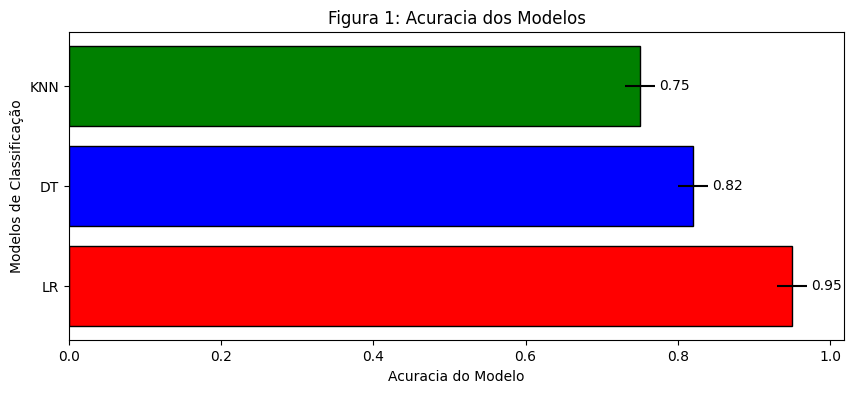

In [254]:
plt.figure(figsize = (10,4))
plt.title('Figura 1: Acuracia dos Modelos')


barWidth=0.15

r=np.arange(len(nome))
a=plt.barh(nome, acuracia, color=['red','blue','g'], xerr= erro, edgecolor='black')


plt.bar_label(a, padding=3)

plt.ylabel('Modelos de Classificação')
plt.xlabel('Acuracia do Modelo')
plt.plot()

In [283]:
warnings.filterwarnings("ignore")
logistic_model = LogisticRegression(solver='liblinear', multi_class='ovr')
logistic_model.fit(X_train, y_train)



Previsao = logistic_model.predict(X_validation)
print('Relatório de Clasfficação - Regressão Logistica: \n', classification_report(y_validation, Previsao))

Relatório de Clasfficação - Regressão Logistica: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.95      1.00      0.97        36

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



In [256]:
MatrizConfusao1=pd.crosstab(y_validation, Previsao, rownames=['Resultado da Amostra de Validação'],colnames=['Resultado do Modelo'], normalize=False, margins=False)
MatrizConfusao1

Resultado do Modelo,0,1
Resultado da Amostra de Validação,,
0,28,2
1,0,36


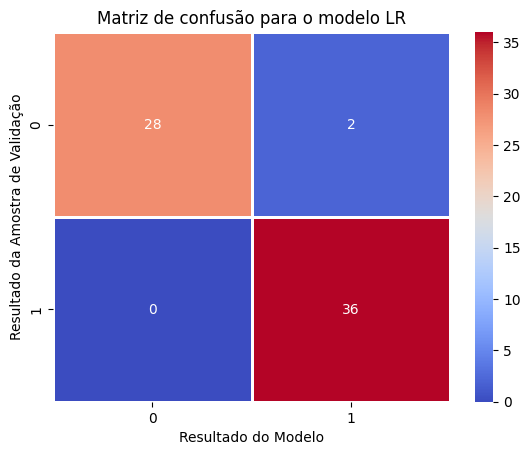

In [257]:
sns.heatmap(MatrizConfusao1, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.title('Matriz de confusão para o modelo LR')
plt.show()

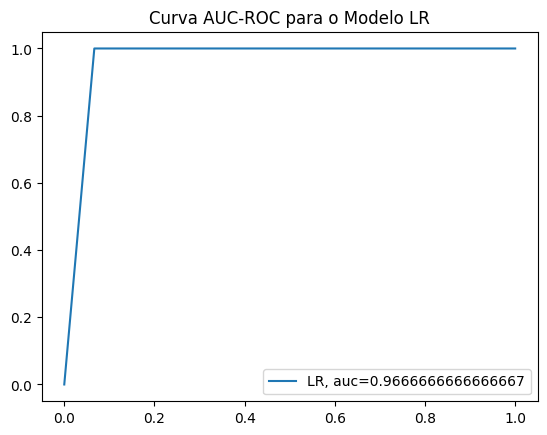

In [258]:
fpr, tpr, thresholds = metrics.roc_curve(y_validation, Previsao)
auc = metrics.roc_auc_score(y_validation, Previsao)
plt.plot(fpr, tpr, label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.title("Curva AUC-ROC para o Modelo LR")
plt.show()

In [269]:
Modelo = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=42)
Modelo.fit(X_train, y_train)
Previsao = Modelo.predict(X_validation)
print('Relatório de Clasfficação - Árvore de Decisão: \n', classification_report(y_validation, Previsao))

Relatório de Clasfficação - Árvore de Decisão: 
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.88      0.78      0.82        36

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.82      0.82      0.82        66



In [270]:
MatrizConfusao2=pd.crosstab(y_validation, Previsao, rownames=['Resultado da Amostra de Validação'],colnames=['Resultado do Modelo'], normalize=False, margins=False)
MatrizConfusao2

Resultado do Modelo,0,1
Resultado da Amostra de Validação,,
0,26,4
1,8,28


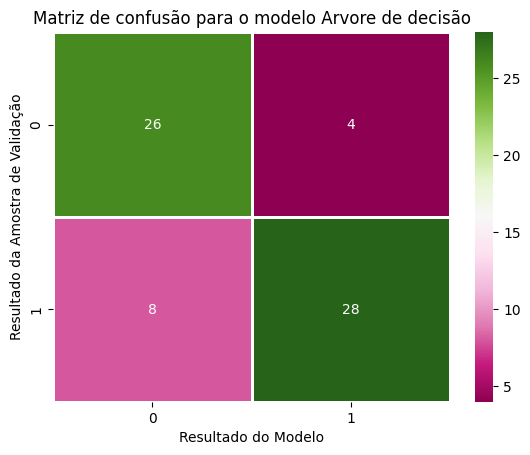

In [271]:
sns.heatmap(MatrizConfusao2, cmap='PiYG', annot=True, linewidth=1, fmt='d')
plt.title('Matriz de confusão para o modelo Arvore de decisão')
plt.show()

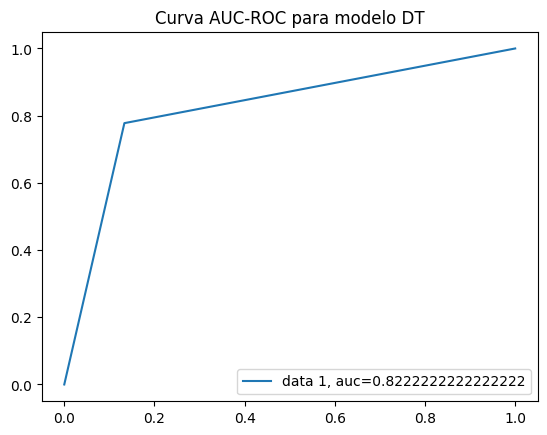

In [272]:
fpr, tpr, thresholds = metrics.roc_curve(y_validation, Previsao)
auc = metrics.roc_auc_score(y_validation, Previsao)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("Curva AUC-ROC para modelo DT")
plt.show()

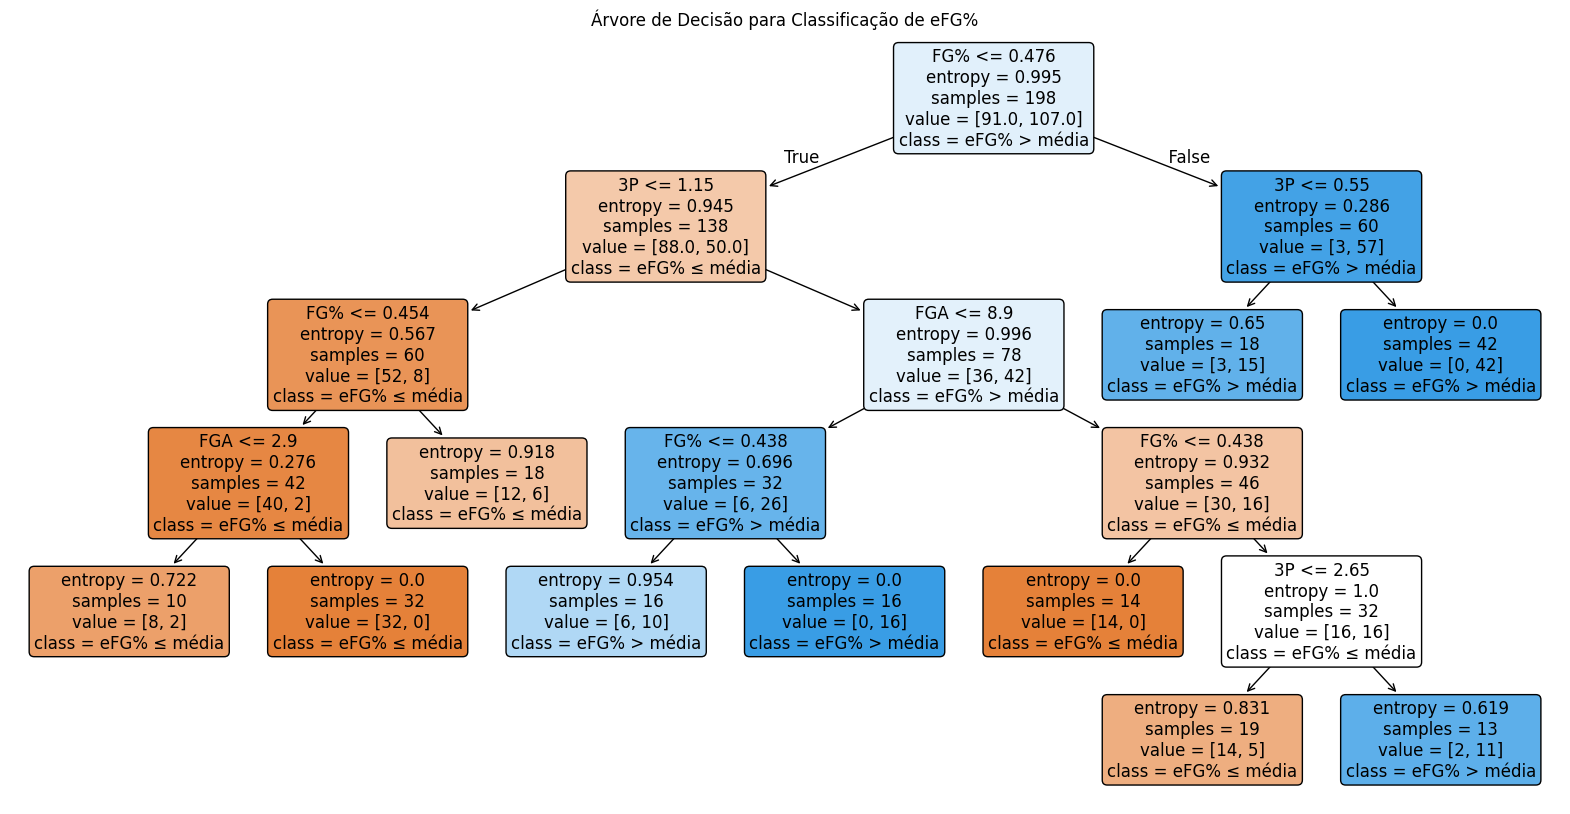

In [273]:
dt_model = models[1]
dt_model.fit(X_train, y_train)
feature_names = ['PTS', 'FG', 'FG%', 'FGA', '3P']
class_names   = ['eFG% ≤ média', 'eFG% > média']


plt.figure(figsize=(20, 10))


tree.plot_tree(
    dt_model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=12
)

plt.title("Árvore de Decisão para Classificação de eFG%")
plt.show()

In [274]:
Modelo=KNeighborsClassifier()
Modelo.fit(X_train, y_train)
Previsao = Modelo.predict(X_validation)
print('Relatório de Clasfficação - Analise de Discriminante: \n', classification_report(y_validation, Previsao))

Relatório de Clasfficação - Analise de Discriminante: 
               precision    recall  f1-score   support

           0       0.71      0.83      0.77        30
           1       0.84      0.72      0.78        36

    accuracy                           0.77        66
   macro avg       0.78      0.78      0.77        66
weighted avg       0.78      0.77      0.77        66



In [276]:
MatrizConfusao3=pd.crosstab(y_validation, Previsao, rownames=['Resultado da Amostra de Validação'],colnames=['Resultado do Modelo'], normalize=False, margins=False)
MatrizConfusao3

Resultado do Modelo,0,1
Resultado da Amostra de Validação,,
0,25,5
1,10,26


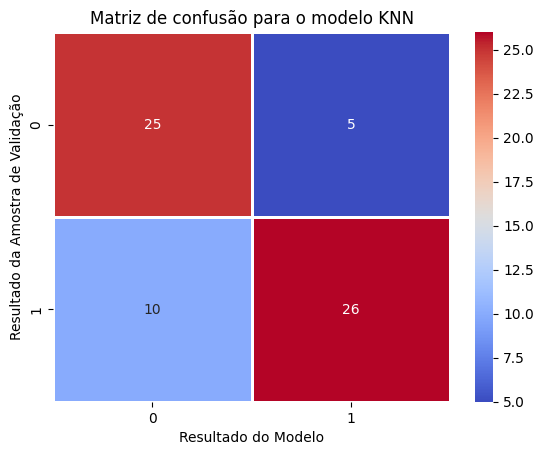

In [278]:
sns.heatmap(MatrizConfusao3, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.title('Matriz de confusão para o modelo KNN')
plt.show()

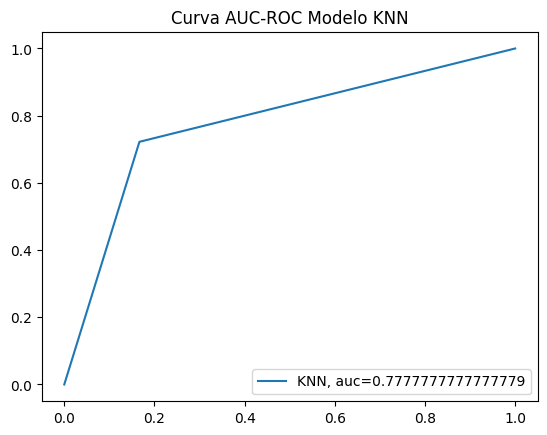

In [279]:
fpr, tpr, thresholds = metrics.roc_curve(y_validation, Previsao)
auc = metrics.roc_auc_score(y_validation, Previsao)
plt.plot(fpr, tpr, label="KNN, auc="+str(auc))
plt.legend(loc=4)
plt.title("Curva AUC-ROC Modelo KNN")
plt.show()

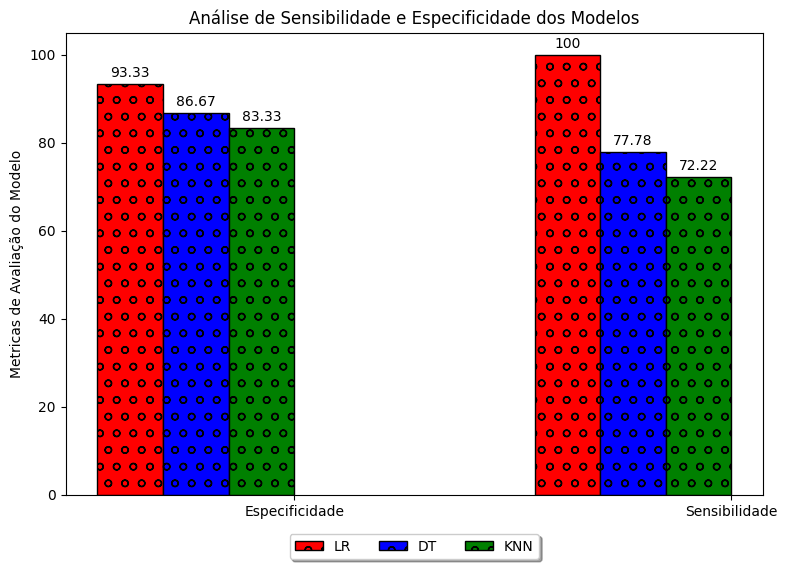

In [280]:
DadosPrevisao1=[round((MatrizConfusao1[0][0]/(MatrizConfusao1[0][0]+MatrizConfusao1[1][0]))*100,2),round((MatrizConfusao1[1][1]/(MatrizConfusao1[0][1]+MatrizConfusao1[1][1]))*100,2)]
DadosPrevisao2=[round((MatrizConfusao2[0][0]/(MatrizConfusao2[0][0]+MatrizConfusao2[1][0]))*100,2),round((MatrizConfusao2[1][1]/(MatrizConfusao2[0][1]+MatrizConfusao2[1][1]))*100,2)]
DadosPrevisao3=[round((MatrizConfusao3[0][0]/(MatrizConfusao3[0][0]+MatrizConfusao3[1][0]))*100,2),round((MatrizConfusao3[1][1]/(MatrizConfusao3[0][1]+MatrizConfusao3[1][1]))*100,2)]
plt.figure(figsize=(9,6))

barWidth=0.15

r=np.arange(len(DadosPrevisao1))
a=plt.bar(r+barWidth, DadosPrevisao1, color=['red'], width=barWidth, bottom=0, label=nome[0], edgecolor='black',hatch='o')
b=plt.bar(r+2*barWidth, DadosPrevisao2, color=['blue'], width=barWidth, bottom=0, label=nome[1], edgecolor='black',hatch='o')
c=plt.bar(r+3*barWidth, DadosPrevisao3, color=['g'], width=barWidth, bottom=0, label=nome[2], edgecolor='black',hatch='o')

plt.bar_label(a, padding=3)
plt.bar_label(b, padding=3)
plt.bar_label(c, padding=3)

plt.title('Análise de Sensibilidade e Especificidade dos Modelos')


plt.xticks([r+3.5*barWidth for r in range(len(DadosPrevisao1))], ['Especificidade', 'Sensibilidade'])
plt.ylabel('Metricas de Avaliação do Modelo')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True, ncol=6)


plt.show()